In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def shifted_hill(X, lambda_val):
    return (1 - lambda_val) * (1 / (1 + (X)**-2)) + lambda_val * (1 / (1 + (X)**2))

In [9]:
def model(y, t, params):
    miR200, ZEB_mRNA, ZEB, let7, LIN28_mRNA, LIN28, HIF1, AMPK = y

    g_mu200, k_mu200, g_mZ, k_mZ, g_Z, k_Z, g_muL, k_muL, g_L, k_L, g_HIF1, g_AMPK = params
    lambda_Z, lambda_S, lambda_HIF, lambda_AMPK = 0.1, 0.1, 0.5, 0.5  # lambda parameters

    # Hill functions for miR-200/ZEB and LIN28/let-7
    HS_minus_Z = shifted_hill(ZEB, lambda_Z)  # Inhibition of miR-200 by ZEB
    HS_minus_S = shifted_hill(1, lambda_S)  # SNAIL interaction with miR-200
    HS_plus_Z = shifted_hill(ZEB, 1)  # Self-activation of ZEB
    HS_minus_LIN28 = shifted_hill(LIN28, 1)  # Let-7 inhibition of LIN28
    HS_plus_HIF1 = shifted_hill(HIF1, lambda_HIF)  # HIF-1 effect on LIN28

    dmiR200_dt = g_mu200 * (1 - HS_minus_Z - HS_minus_S) - k_mu200 * miR200

    # ZEB (mRNA and protein)
    dZEB_mRNA_dt = g_mZ * (HS_plus_Z) - k_mZ * ZEB_mRNA
    dZEB_dt = g_Z * ZEB_mRNA * HS_minus_LIN28 - k_Z * ZEB

    #let-7
    dlet7_dt = g_muL * (1 - HS_minus_LIN28) - k_muL * let7

    # LIN28 (mRNA and protein)
    dLIN28_mRNA_dt = g_L - k_L * LIN28_mRNA + g_HIF1 * HS_plus_HIF1  # LIN28 is influenced by HIF-1
    dLIN28_dt = g_L * LIN28_mRNA - k_L * LIN28

    # HIF-1 dynamics
    dHIF1_dt = g_HIF1 * (1 - AMPK) - 0.1 * HIF1  # HIF-1 is influenced by AMPK

    # AMPK dynamics
    dAMPK_dt = g_AMPK * (1 - LIN28) - 0.1 * AMPK  # AMPK activity is modulated by LIN28

    return [dmiR200_dt, dZEB_mRNA_dt, dZEB_dt, dlet7_dt, dLIN28_mRNA_dt, dLIN28_dt, dHIF1_dt, dAMPK_dt]

In [10]:
# Initial concentrations for miR-200, ZEB mRNA, ZEB protein, let-7, LIN28 mRNA, LIN28, HIF-1, AMPK
y0 = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

# Parameters --???? EDIT values
params = [2100, 0.05, 11, 0.5, 100, 0.1, 200, 0.05, 100, 0.1, 22, 0.5]


In [11]:
t = np.linspace(0, 100, 500)

# Solve ODE system
solution = odeint(model, y0, t, args=(params,))
miR200, ZEB_mRNA, ZEB, let7, LIN28_mRNA, LIN28, HIF1, AMPK = solution.T


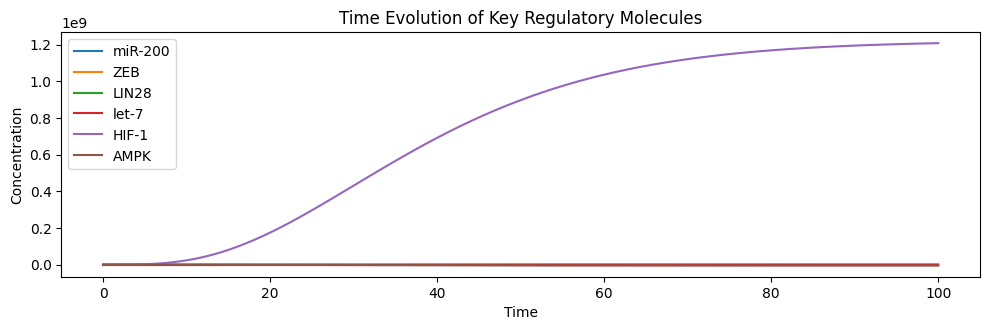

In [12]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, miR200, label="miR-200")
plt.plot(t, ZEB, label="ZEB")
plt.plot(t, LIN28, label="LIN28")
plt.plot(t, let7, label="let-7")
plt.plot(t, HIF1, label="HIF-1")
plt.plot(t, AMPK, label="AMPK")
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title('Time Evolution of Key Regulatory Molecules')

plt.tight_layout()
plt.show()



In [ ]:
### NULLCLINES?